# **Data science workshop project**
Elad, Tsach, Oz, Eva

The predictors of in-hospital mortality for admitted patients remain poorly characterized.

**Goal of the projet**: We aimed to develop and validate a prediction model for all-cause in-hospital mortality among admitted patients.


## **Part 1- Data analysis**

**Goal: Understand the data to build better model of prediction**


- 85 features in original dataset
- not separated in train/test/validation
- prediction problem: classification : hospital death or not

In [151]:
#data processing
import pandas as pd
import numpy as np

#data visualizations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#Machine learning library
import sklearn

In [152]:
complete_data = pd.read_csv('dataset.csv')

In [153]:
complete_data.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,92,admit,CTICU,0.541667,73.9,113.0,502.01,0,0.0,3.0,6.0,0.0,4.0,118.0,0.0,40.0,36.0,39.3,0.0,68.0,37.0,68.0,37.0,119.0,72.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,131.0,73.0,131.0,73.0,39.9,37.2,68.0,63.0,68.0,63.0,119.0,108.0,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,131.0,115.0,131.0,115.0,168.0,109.0,4.0,3.4,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,90,admit,Med-Surg ICU,0.927778,70.2,108.0,203.01,0,0.0,1.0,3.0,0.0,1.0,120.0,0.0,46.0,33.0,35.1,1.0,95.0,31.0,95.0,31.0,118.0,72.0,120.0,38.0,120.0,38.0,32.0,12.0,100.0,70.0,159.0,67.0,159.0,67.0,36.3,35.1,61.0,48.0,61.0,48.0,114.0,100.0,85.0,57.0,85.0,57.0,31.0,28.0,95.0,70.0,95.0,71.0,95.0,71.0,145.0,128.0,4.2,3.8,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,93,admit,Med-Surg ICU,0.000694,95.3,122.0,703.03,0,0.0,3.0,6.0,0.0,5.0,102.0,0.0,68.0,37.0,36.7,0.0,88.0,48.0,88.0,48.0,96.0,68.0,102.0,68.0,102.0,68.0,21.0,8.0,98.0,91.0,148.0,105.0,148.0,105.0,37.0,36.7,88.0,58.0,88.0,58.0,96.0,78.0,91.0,83.0,91.0,83.0,20.0,16.0,98.0,91.0,148.0,124.0,148.0,124.0,NaN,NaN,NaN,NaN,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,92,admit,CTICU,0.000694,61.7,203.0,1206.03,1,0.0,4.0,6.0,0.0,5.0,114.0,1.0,60.0,4.0,34.8,1.0,48.0,42.0,48.0,42.0,116.0,92.0,84.0,84.0,84.0,84.0,23.0,7.0,100.0,95.0,158.0,84.0,158.0,84.0,38.0,34.8,62.0,44.0,NaN,NaN,100.0,96.0,92.0,71.0,NaN,NaN,12.0,11.0,100.0,99.0,136.0,106.0,NaN,NaN,185.0,88.0,5.0,3.5,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,91,admit,Med-Surg ICU,0.073611,NaN,119.0,601.01,0,0.0,NaN,NaN,NaN,NaN,60.0,0.0,103.0,16.0,36.7,0.0,99.0,57.0,99.0,57.0,89.0,60.0,104.0,90.0,104.0,90.0,18.0,16.0,100.0,96.0,147.0,120.0,147.0,120.0,37.2,36.7,99.0,68.0,99.0,68.0,89.0,76.0,104.0,92.0,104.0,92.0,NaN,NaN,100.0,100.0,130.0,120.0,130.0,120.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [154]:
complete_data.shape   #dataset sizes: 85 columns and 91713 rows/patients

(91713, 85)

In [155]:
#column / features and data types
complete_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

We have the column number 83 that is empty so we will delete it. 

In addition, we will also remove the feature encounter_id and patient_id becuse their are unique for each patient and do not impact on the prediction.

In [156]:
complete_data.drop(complete_data.columns[[0,1,83]], axis=1, inplace=True)
features = complete_data.columns
numerical_features = ["age", "bmi","height", "weight", "elective_surgery", 
                      "pre_icu_los_days", "gcs_eyes_apache","apache_2_diagnosis",
                      "gcs_motor_apache", "gcs_verbal_apache", "heart_rate_apache",
                     "map_apache", "resprate_apache", "temp_apache", "d1_diasbp_max",
                      "d1_diasbp_min","d1_diasbp_noninvasive_max", "d1_diasbp_noninvasive_min",
                      "d1_heartrate_max", "d1_heartrate_min", "d1_mbp_max", "d1_mbp_min", 
                      "d1_mbp_noninvasive_max", "d1_mbp_noninvasive_min"]

categorial_features = ["hospital_id", "ethnicity", "gender", "icu_admit_source"]

binary_features = ["arf_apache", "gcs_unable_apache", "intubated_apache", 
                   "ventilated_apache", "elective_surgery", "gender", "apache_post_operative"]


Important technical words: 
- icu: intensive care unit
- APACHE : Acute Physiology, Age, Chronic Health Evaluation
- GCS - glasgow coma scale :  clinical scale used to reliably measure a person's level of consciousness after a brain injury. A person's GCS score can range from 3 (completely unresponsive) to 15 (responsive). 

**Lower GCS scores are correlated with higher risk of death. high score means hight responsiveness and low one means low conscious. 
However, the GCS score alone should not be used on its own to predict the outcome for an individual person with brain injury.**
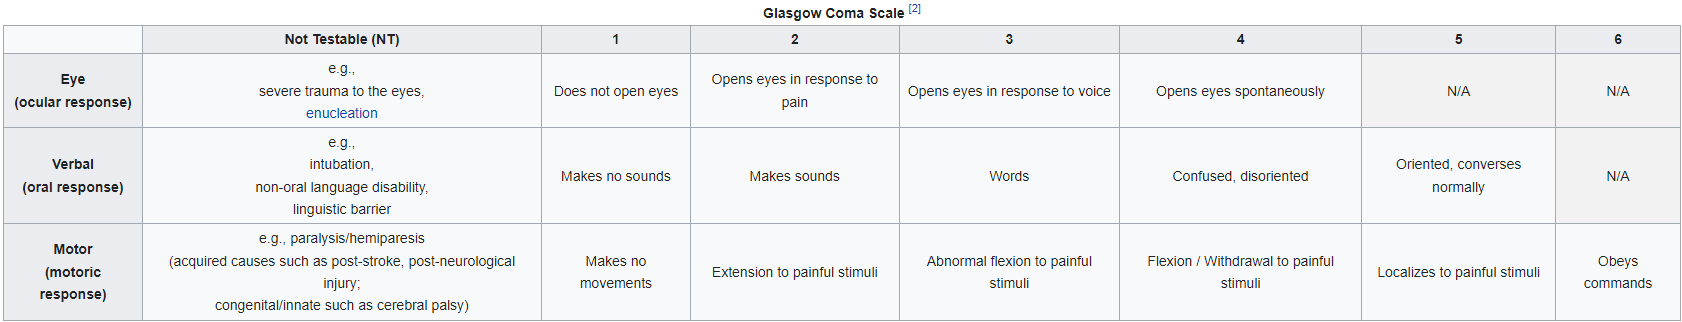


Explication about features :


    - bmi: The body mass index of the person on unit admission => BMI Categories:
            Underweight = <18.5
            Normal weight = 18.5–24.9
            Overweight = 25–29.9
            Obesity = BMI of 30 or greater
             => maybe change this numerical data to category : more meaningful for a model 
             because close number can have a very different impact depends on the exact value.
         
     - elective surgery: Whether the patient was admitted to the hospital for an elective 
     surgical operation (surgery that is scheduled in advance 
     because it does not 
     involve a medical emergency.) (binary : 0 or 1)
     - icu_admit_source: The location of the patient prior to being admitted to the unit 
     (categorical: Accident & Emergency, OperatingRoom / Recovery,...)
     - icu_id: A unique identifier for the unit to which the patient was admitted 
     - icu_type: A classification which indicates the type of care the unit is capable of 
     providing
     - pre_icu_los_days: amount of time the patient wait for admission
     - apache_2_diagnosis: APACHE II score is a general measure of disease severity based on 
     current physiologic measurements, age & previous health 
     conditions. The score can help in the assessment of patients to determine the 
     level & degree of diagnostic & therapeutic intervention.
     - apache_3j_diagnosis: methodology in order to more accurately predict hospital 
     mortality risk for critically ill hospitalized adults.
     - apache_post_operative: The APACHE operative status (binary:  1 for post-operative, 
     0 for non- operative)
     - arf_apache: arf is acute renal failure, remains highly prevalent with a high rate of 
     morbidity and mortality.(binary: 
                  1 means positive Acute Renal Failure  and occurs 
                  if within the first 24 hrs of admission to hospital:
                    • Creatinine > 124 µmol/L and ≤ 177 µmol/L and subsequent creatinines show a                          steady increase > 177 µmol/L
                    OR
                    • Creatinine > 177 µmol/L and
                    a) patient has documented pre-admission creatinine ≤ 124 µmol/L
                    OR
                    b) creatinine decreases to < 124 µmol/L while patient is hospitalized.
                     0 otherwise)
     
     
    - gcs_eyes_apache: The eye opening component of the Glasgow Coma Scale measured 
    during the first 24 hours and part of apache score: value 
    between 1 and 4 integer so can be considered as 
    categorical or numerical but with order. There are four grades starting with 
    the most severe:

        1 - No opening of the eye
        2 - Eye opening in response to pain stimulus. A peripheral pain stimulus, 
        such as squeezing the lunula area of the person's fingernail 
        is more effective than a central stimulus such as a trapezius 
        squeeze, due to a grimacing effect.
        3 - Eye opening to speech. Not to be confused with the awakening of a sleeping 
        person; such people receive a score of 4, not 3.
        4 - Eyes opening spontaneously
        There are case where we can t measure it: not testable and can be reason for 
        missing value.
        
    - gcs_motor_apache: The motor component of the Glasgow Coma Scale measured during the 
    first 24                            hours and part of apache score. There are six 
    grades starting with the most                          severe:

        1- No motor response. Lack of any motor response should raise suspicion for 
        spinal cord injury.
        2- Abnormal Extension in response to pain. Different guidelines report different 
        evaluation of abnormal extension. While some sources indicate extension at the elbow is sufficient, other sources use the language "decerebrate posturing". It is important to note 
        that the original publication of the Glasgow Coma Scale explicitly avoided the term "decerebrate extension" because it implied specific anatomical findings.
        3- Abnormal Flexion in response to pain. Different guidelines report different evaluation.           While some sources focus on arm movements, other sources use the term "decorticate                   posturing".
        4- Normal Flexion (absence of abnormal posturing; unable to lift hand past chin with                 supraorbital pain but does pull away when nailbed is pinched)
        5- Localizes to pain (purposeful movements towards painful stimuli; e.g., brings hand up             beyond chin when supraorbital pressure applied)
        6- Obeys commands (the person does simple things as asked)
        other possibility NT (Not testable) so it can be reason of missing data
    
    - gcs_unable_apache: binary value that is 1 if GCS was unable to be assessed due to patient                                sedation so this feature explain the missing values in oother 
    gcs features.
    
    - gcs_verbal_apache: The verbal component of the Glasgow Coma Scale measured during 
    the first 24                          hours and part of apache score. There are 
    five grades starting with the most                          severe:

        1- No verbal response
        2- Incomprehensible sounds. Moaning but no words.
        3- Inappropriate words. Random or exclamatory articulated speech, but no 
        conversational               exchange. Speaks words but no sentences.
        4- Confused. The person responds to questions coherently but there is some 
        disorientation and         confusion.
        5- Oriented. Person responds coherently and appropriately to questions such as 
        the person’s name and age, where they are and why, the year, month, etc.
        Same cases cannot get a value like: intubation, deafness, language barrier, 
        sedation from drugs, and paralysis.
    

    - map_apache: The mean arterial pressure measured during the first 24 hours which 
    results in the highest APACHE III score, numerical
    
    - resprate_apache: The respiratory rate measured during the first 24 hours which results 
    in the highest APACHE III score, numerical
    
    - temp_apache: temperature which is numerical 
    
    - ventilated_apache:Whether the patient was invasively ventilated at the time of the highest                             scoring arterial blood gas using the oxygenation scoring algorithm, 
    including any mode of positive pressure ventilation delivered through a circuit                                 attached to an endo-tracheal tube or tracheostomy
    
    - mbp : mean blood pressure
    
    - diasbp_noninvasive: diastolic blood pressure during the first 24 hours of their unit 
    stay, non- invasively measured
    
    - mbp_noninvasive: diastolic blood pressure during the first 24 hours of their 
    unit stay, non- invasively measured
     
     (need to finish for other non clear features)
     

In [157]:
class_prediction = "hospital_death" #binary : 0 or 1

In [158]:
complete_data["hospital_death"].value_counts()

0    83798
1     7915
Name: hospital_death, dtype: int64

<AxesSubplot:>

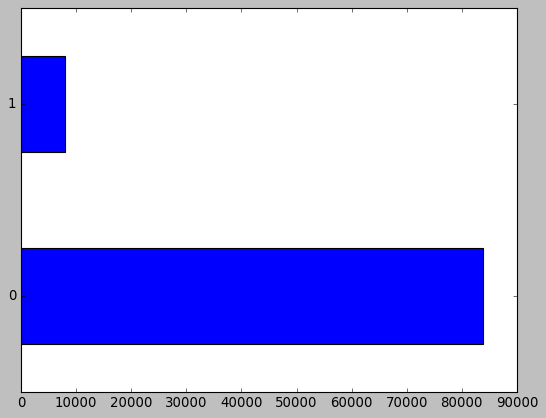

In [173]:
hd = complete_data["hospital_death"].value_counts()
hd.plot(kind="barh")

The distribution of the two classes is not balanced at all : it will be challenging because most of the patients in the dataset haven t hospital mortality.

In [160]:
complete_data.describe() #only for numerical data

,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,heart_rate_apache,intubated_apache,map_apache,resprate_apache,temp_apache,ventilated_apache,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,d1_glucose_max,d1_glucose_min,d1_potassium_max,d1_potassium_min,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,90051.000000,90612.000000,91713.000000,90998.000000,89812.000000,89812.000000,90676.000000,89812.000000,90835.000000,90998.000000,90719.000000,90479.000000,87605.000000,90998.000000,91548.000000,91548.000000,90673.000000,90673.000000,91568.000000,91568.000000,91493.000000,91493.000000,90234.000000,90234.000000,91328.000000,91328.000000,91380.000000,91380.000000,91554.000000,91554.00000,90686.000000,90686.000000,89389.000000,89389.000000,88094.000000,88094.000000,84363.000000,84363.000000,88923.000000,88923.000000,87074.000000,87074.000000,82629.000000,82629.000000,87356.000000,87356.000000,87528.000000,87528.000000,88102.000000,88102.000000,84372.000000,84372.000000,85906.000000,85906.000000,82128.000000,82128.000000,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,91713.000000
mean,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,185.401739,558.216377,0.201106,0.027979,3.465049,5.471195,0.009528,3.994778,99.707932,0.151223,88.015873,25.811007,36.414472,0.325721,88.491873,50.161314,88.610513,50.242597,103.000568,70.321848,104.651339,64.871859,104.590454,64.941541,28.882774,12.846279,99.241836,90.454826,148.339745,96.92387,148.235549,96.993313,37.284201,36.268391,75.354508,62.838150,75.805934,63.270616,92.229198,83.663720,91.612950,79.400028,91.594126,79.709315,22.633614,17.211525,98.044637,95.174310,133.247395,116.362296,133.054686,116.549625,174.638023,114.380940,4.251594,3.934658,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,0.086302
std,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,86.050882,463.266985,0.400829,0.164912,0.951715,1.288376,0.097148,1.560166,30.870502,0.358268,42.032412,15.106312,0.833496,0.468646,19.798379,13.317586,19.793743,13.341521,22.017346,17.115903,20.808358,15.679680,20.701171,15.701305,10.701973,5.064943,1.794181,10.030069,25.733259,20.67793,25.792453,20.705016,0.693287,0.745147,18.409190,16.363229,18.481826,16.422063,21.823704,20.279869,20.533174,19.130590,20.552018,19.236507,7.515043,6.072588,3.212934,6.625227,27.556986,26.510637,27.679751,26.623528,86.687955,38.273013,0.667355,0.579610,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,0.280811
min,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,101.000000,0.010000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,30.000000,0.000000,40.000000,4.000000,32.100000,0.000000,46.000000,13.000000,46.000000,13.000000,58.000000,0.000000,60.000000,22.000000,60.000000,22.000000,14.000000,0.000000,0.000000,0

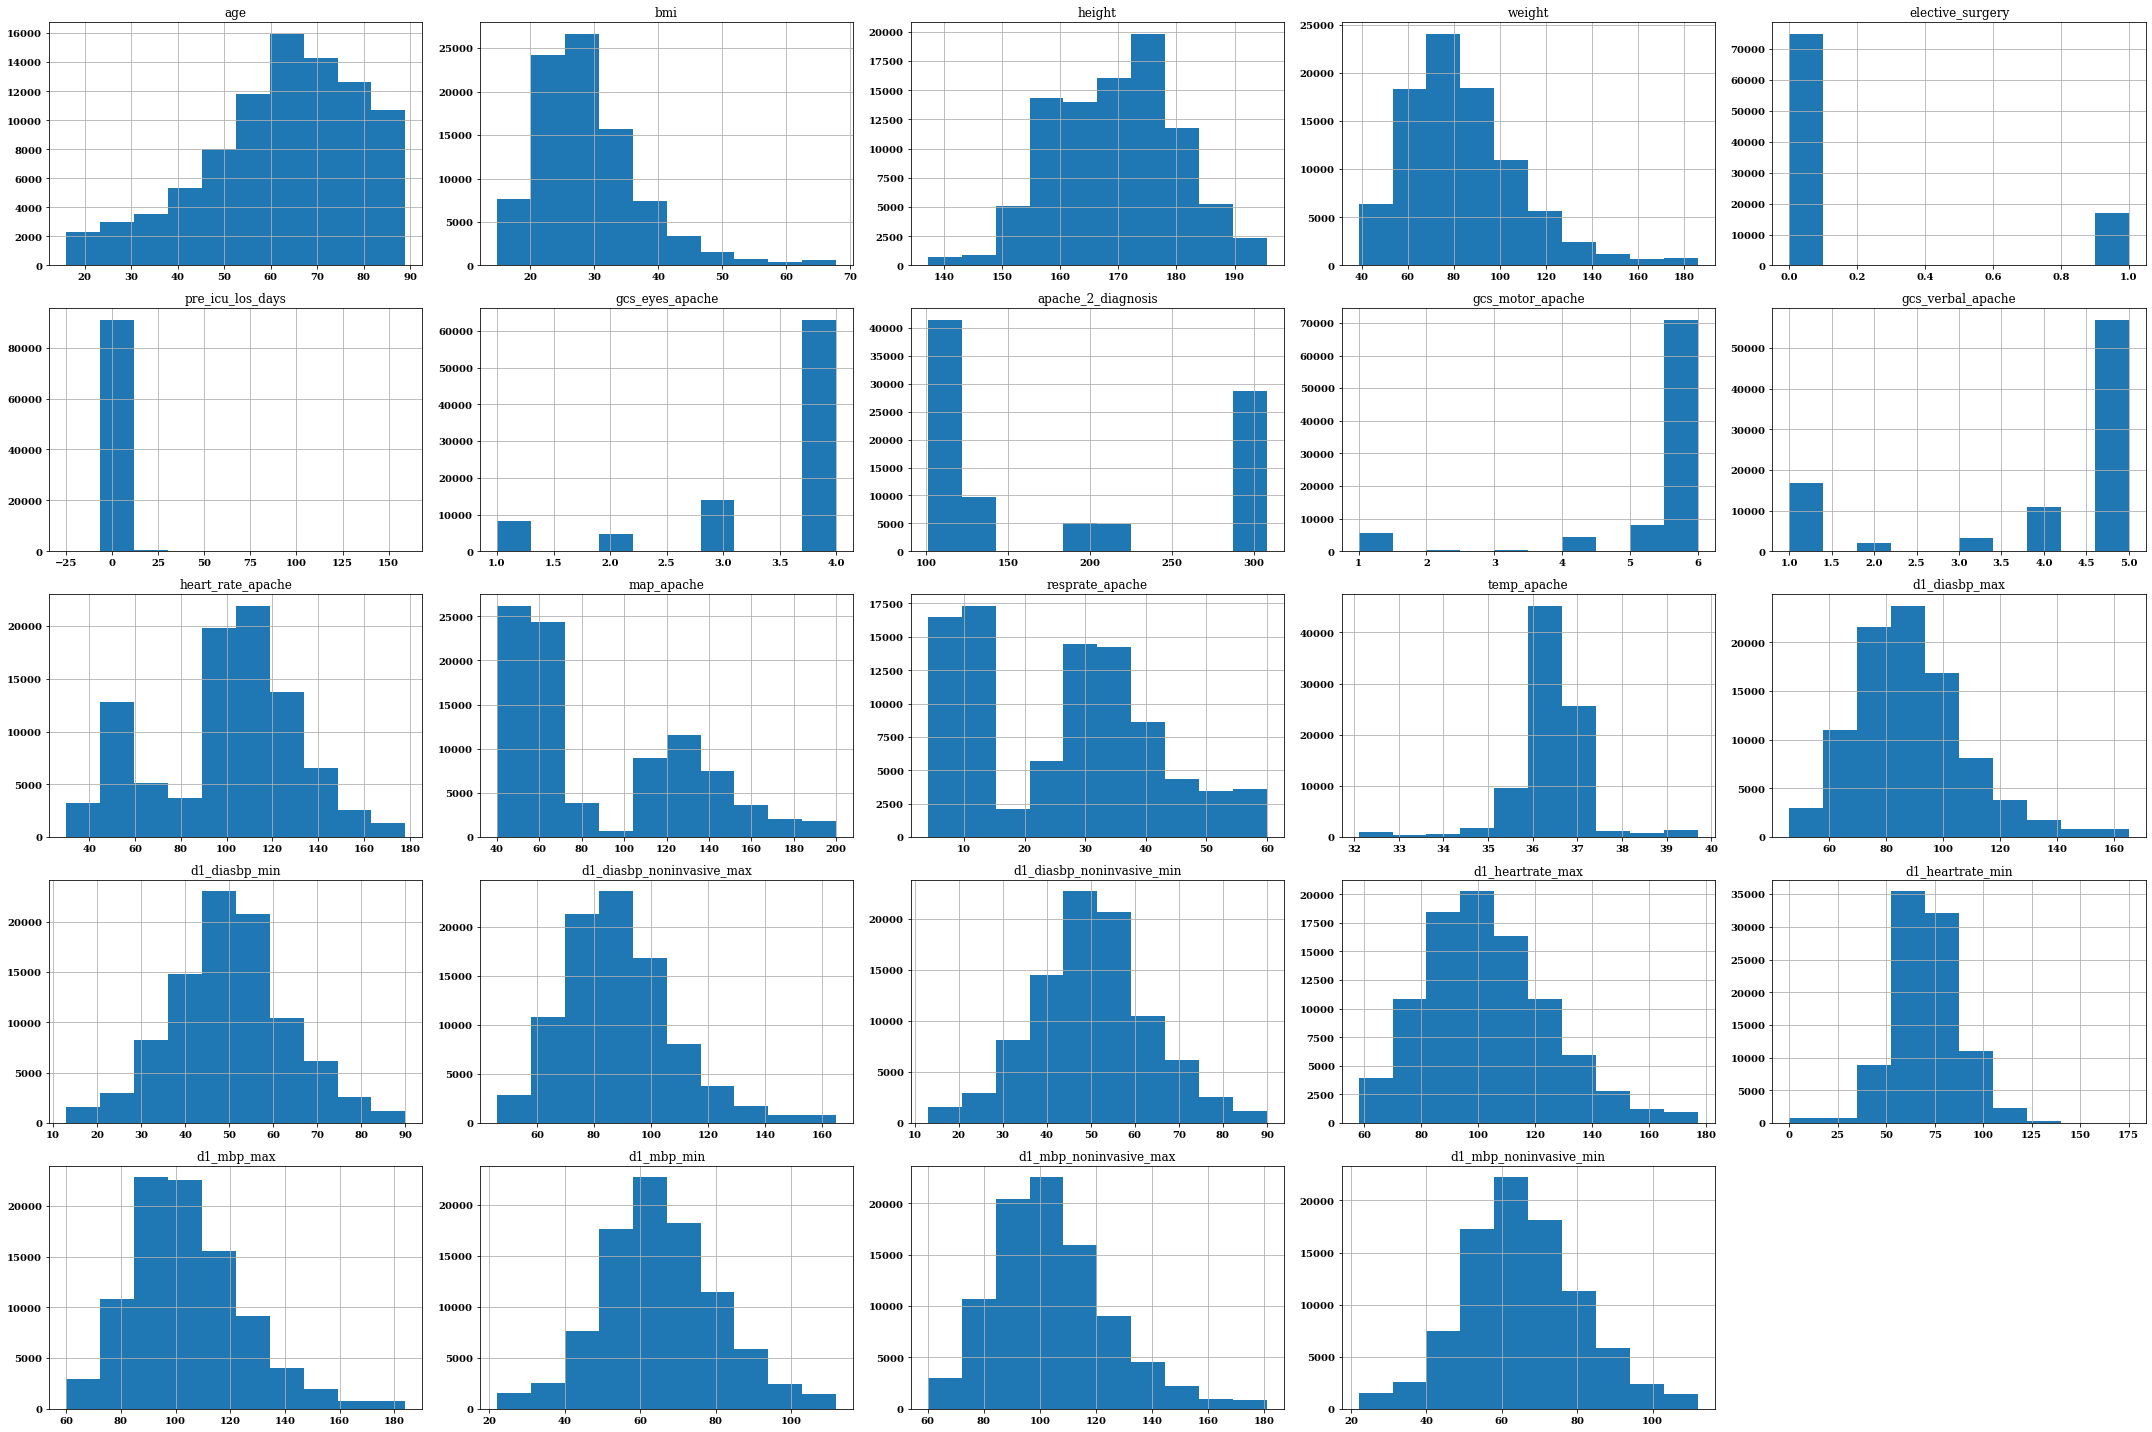

In [161]:
#show data distribution

df = pd.read_csv('dataset.csv')

df[numerical_features].hist(alpha=1, figsize=(30, 20))
plt.tight_layout()
plt.show()


Missing values: let s check number of missing values in each features

<AxesSubplot:>

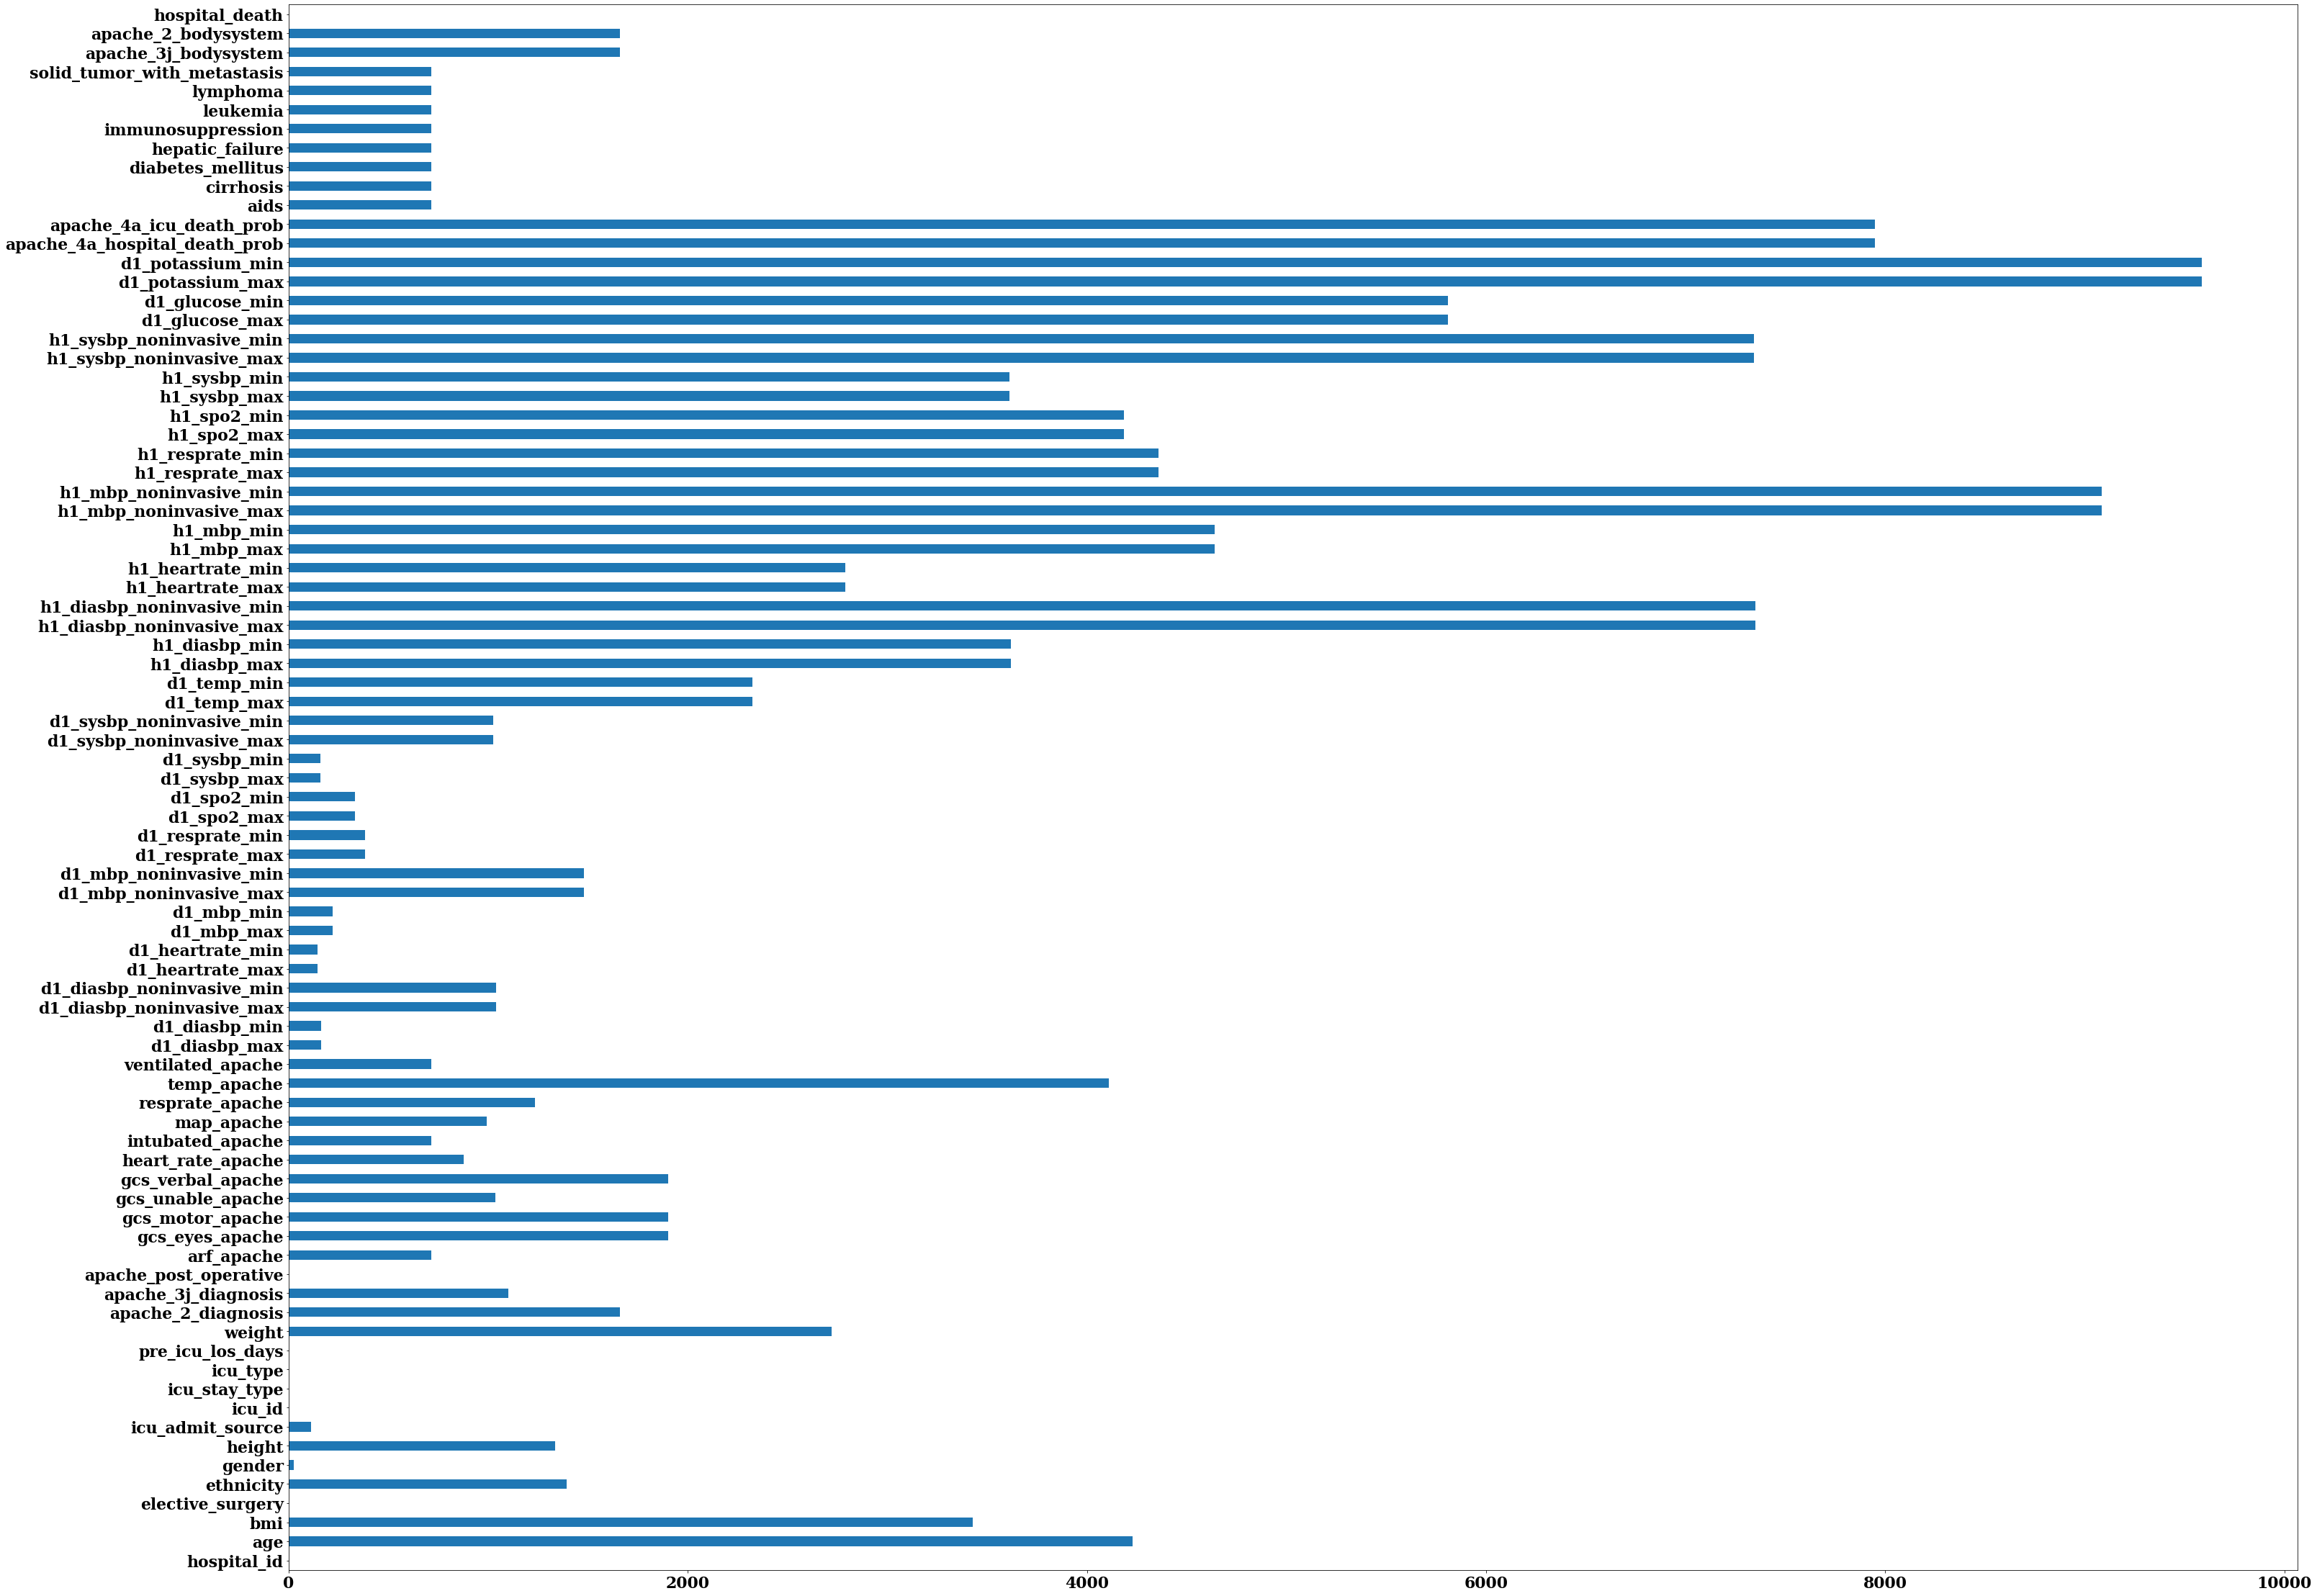

In [165]:
nb_nan = complete_data.isnull().sum()
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 22}
import matplotlib as mpl
#mpl.rc('font', **font)

#mpl.rcParams['figure.dpi'] = 150
nb_nan.plot.barh(figsize=(50,40)) #need to get it bigger

<AxesSubplot:>

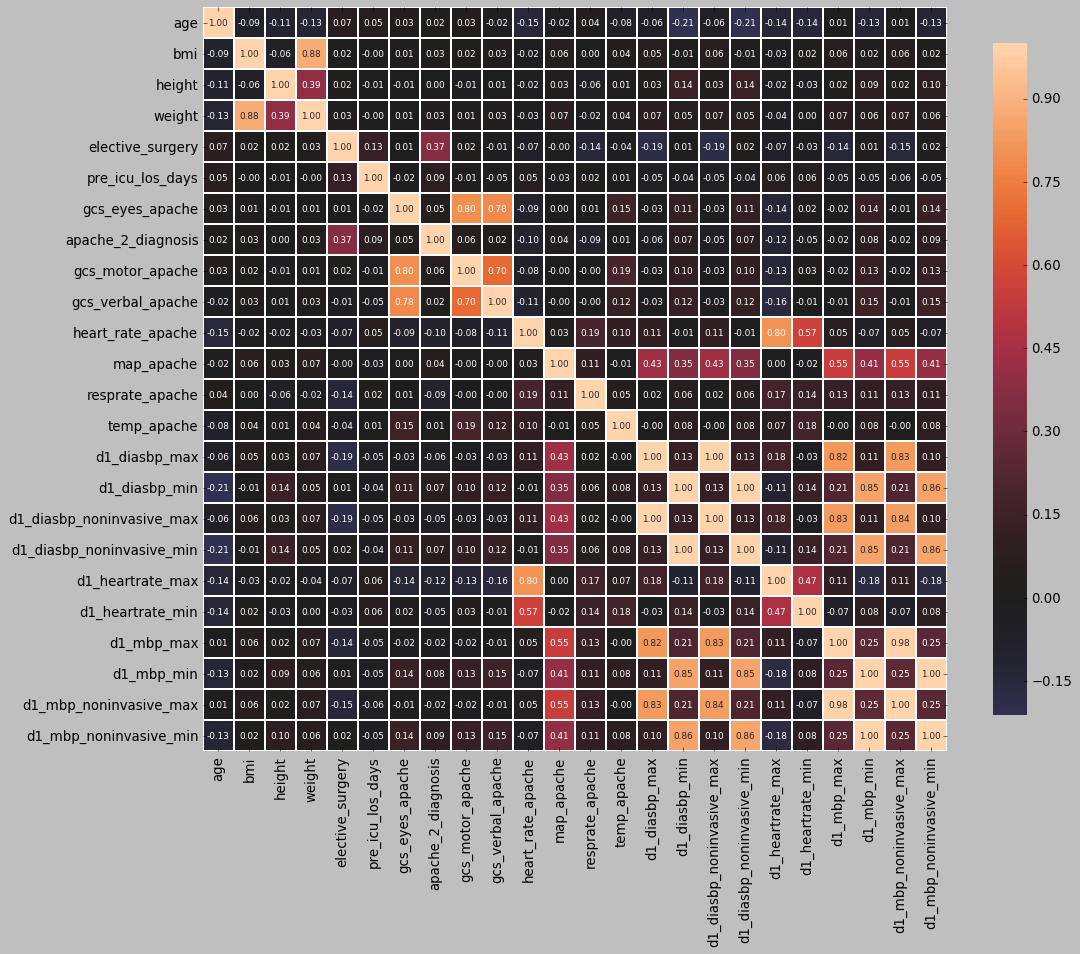

In [171]:
import matplotlib.pyplot as mp
import seaborn as sb
#correlations
mpl.style.use('classic')
correlations = complete_data[numerical_features].corr()

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
            square=True, linewidths=.5, annot=True,  annot_kws={"fontsize":8}, cbar_kws={"shrink": .70})



to do:
- add explanation of last features and add their name in the list : binary/categorical/numerical_features
- what to do with missing values?
- check link between  feature 'icu_admit_source' and 'icu_id' and 'icu_type' => maybe remove one of them or change representation? change it to category??
- check link between all apache features:  maybe remove one of them or change representation? change it to category??
- question: #"icu_id" : A unique identifier for the unit to which the patient was admitted : it s a number , but there is no real order so d ont know what to do with this
#maybe not need to take in the model each value for apache score
#but only apache score (apache diagnosis)??
 - check codes from the course and code from kaggle